🎵 SPOTIFY HIT PREDICTION - VISUAL ANALYSIS
✅ Loaded data from: ../data/raw/Spotify_Data.csv
   Shape: 2,017 songs, 17 features

📊 DATASET OVERVIEW
Total songs: 2,017
Features: 17
Memory usage: 0.5 MB

Columns in dataset:
   1. Unnamed: 0
   2. acousticness
   3. danceability
   4. duration_ms
   5. energy
   6. instrumentalness
   7. key
   8. liveness
   9. loudness
  10. mode
  11. speechiness
  12. tempo
  13. time_signature
  14. valence
  15. target
  16. song_title
  17. artist

🎯 Target: target
Hit rate: 50.6%
Hit songs: 1,020
Non-hit songs: 997

📊 VISUALIZATION 1: How many songs are hits?


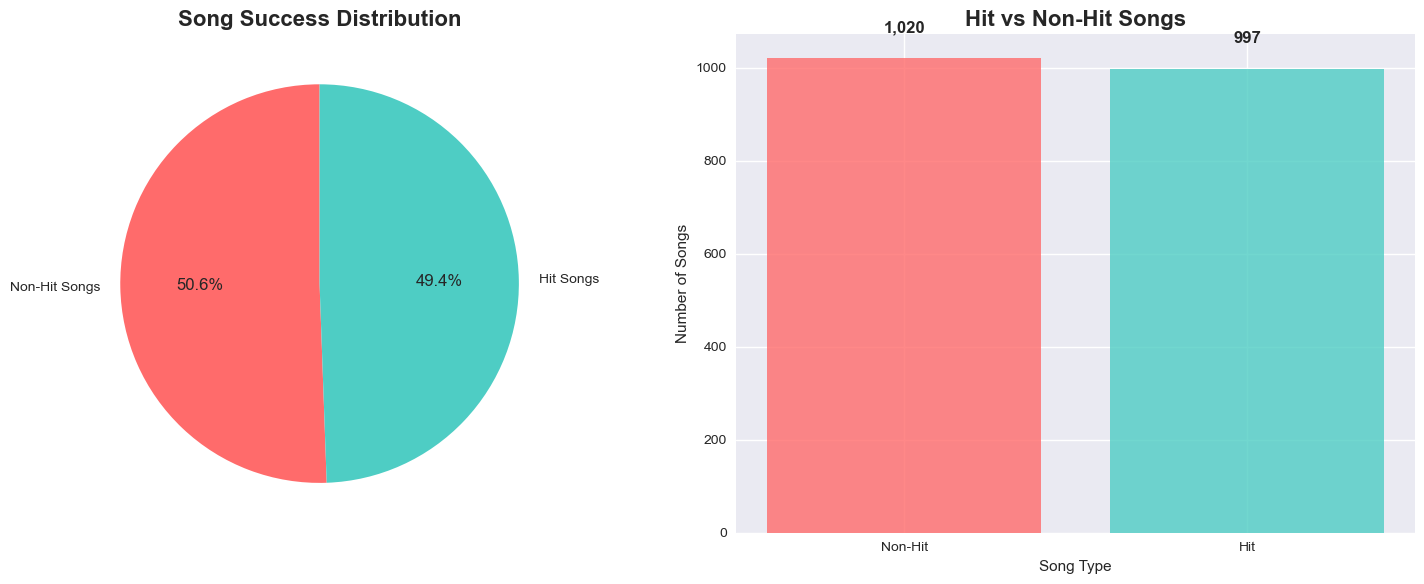

💡 INSIGHT: 50.6% of songs in our dataset are hits

📊 VISUALIZATION 2: What's different about hit songs?
Available audio features: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']


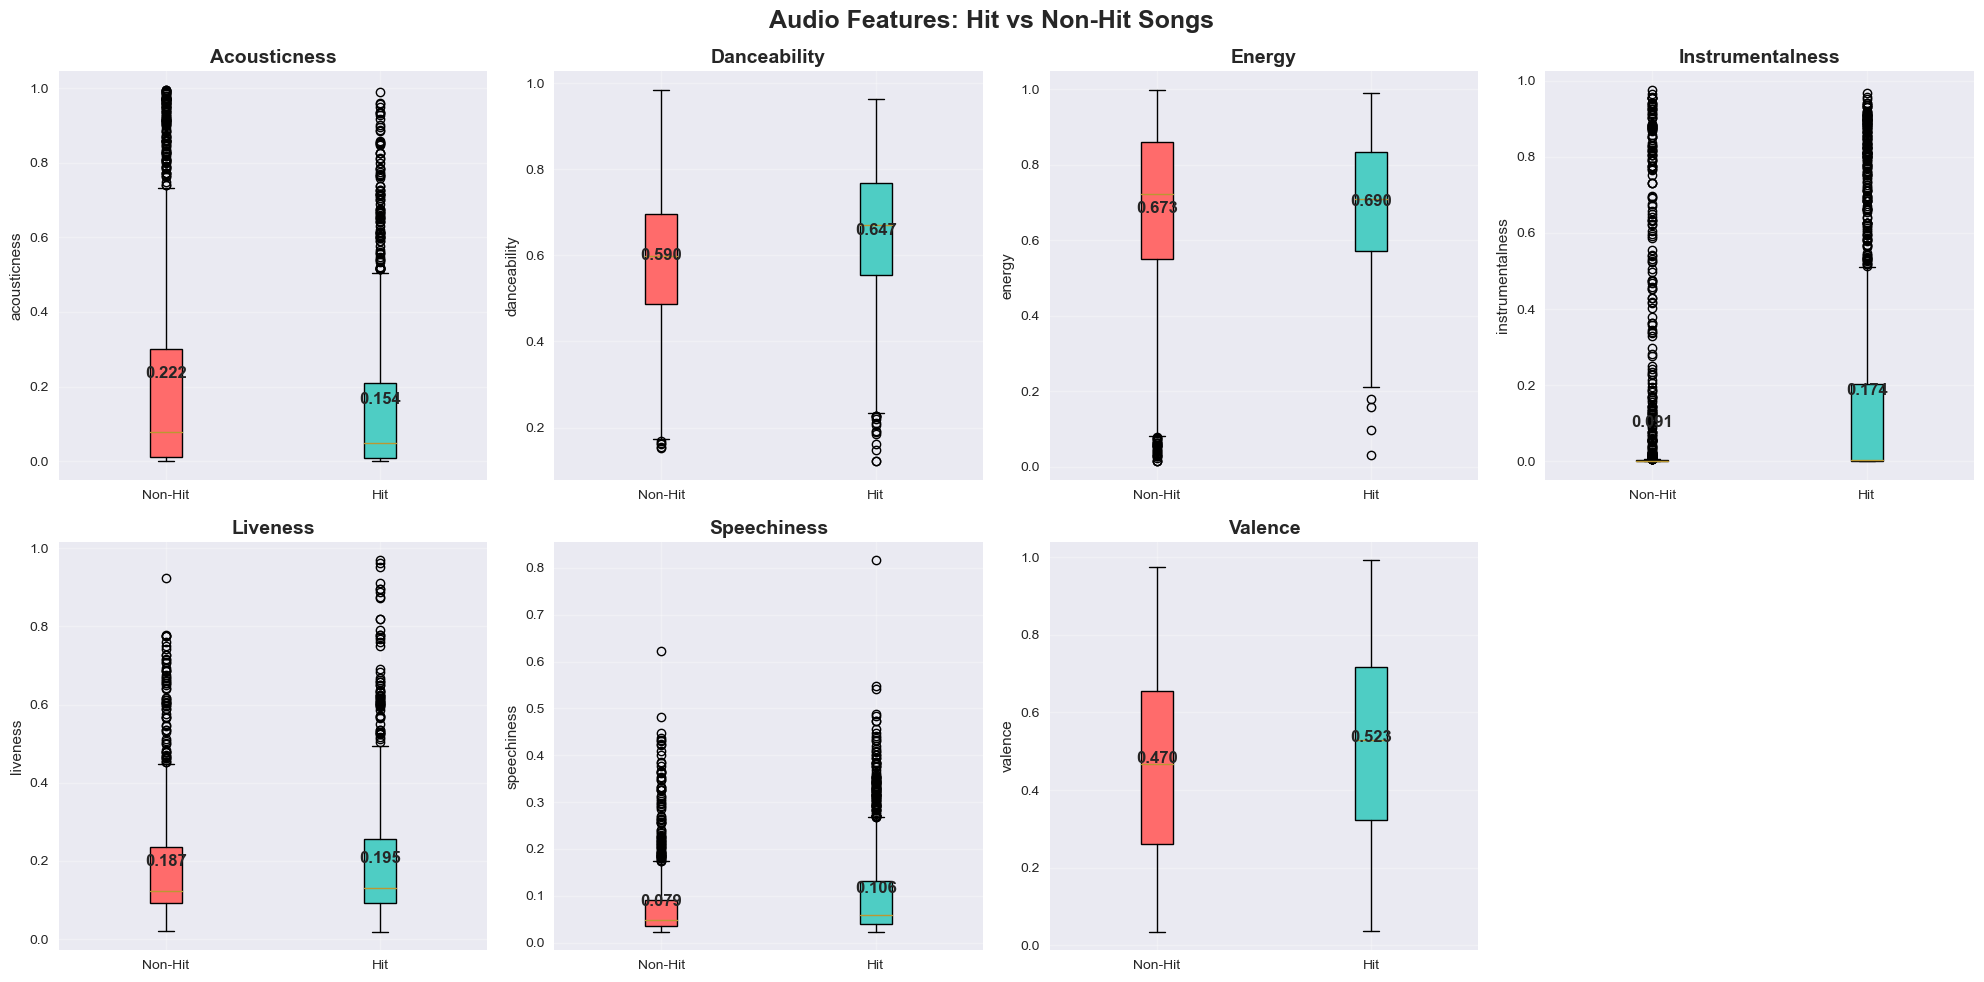


💡 KEY DIFFERENCES:
   • Hit songs have LOWER acousticness: 0.154 vs 0.222
   • Hit songs have HIGHER danceability: 0.647 vs 0.590
   • Hit songs have HIGHER energy: 0.690 vs 0.673
   • Hit songs have HIGHER instrumentalness: 0.174 vs 0.091
   • Hit songs have HIGHER liveness: 0.195 vs 0.187
   • Hit songs have HIGHER speechiness: 0.106 vs 0.079
   • Hit songs have HIGHER valence: 0.523 vs 0.470

📊 VISUALIZATION 3: How do features relate to each other?


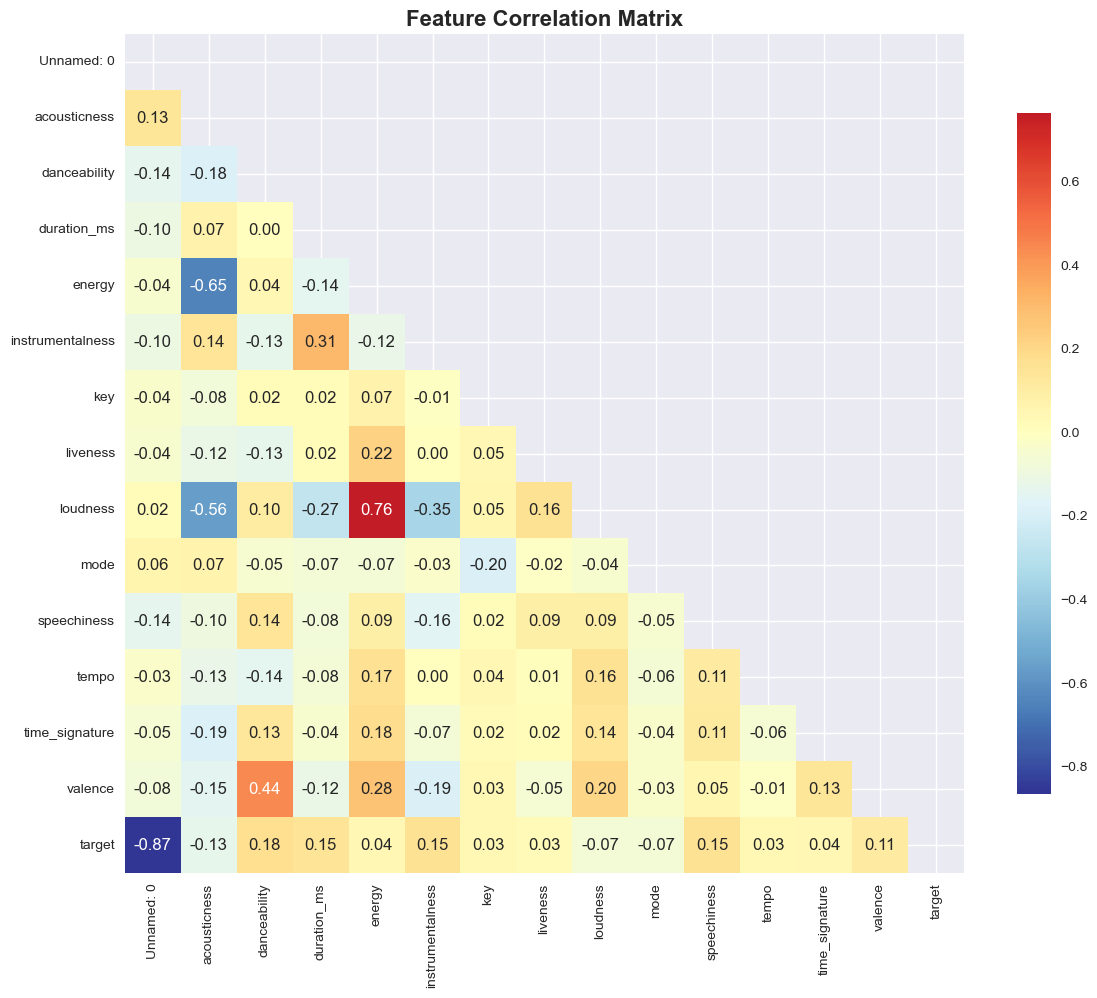


💡 STRONGEST PREDICTORS OF SUCCESS:
   • Unnamed: 0: 0.866 (negatively correlated)
   • danceability: 0.177 (positively correlated)
   • speechiness: 0.154 (positively correlated)
   • instrumentalness: 0.153 (positively correlated)
   • duration_ms: 0.147 (positively correlated)
   • acousticness: 0.130 (negatively correlated)
   • valence: 0.108 (positively correlated)
   • mode: 0.072 (negatively correlated)
   • loudness: 0.072 (negatively correlated)

📊 VISUALIZATION 4: How do feature levels affect success?


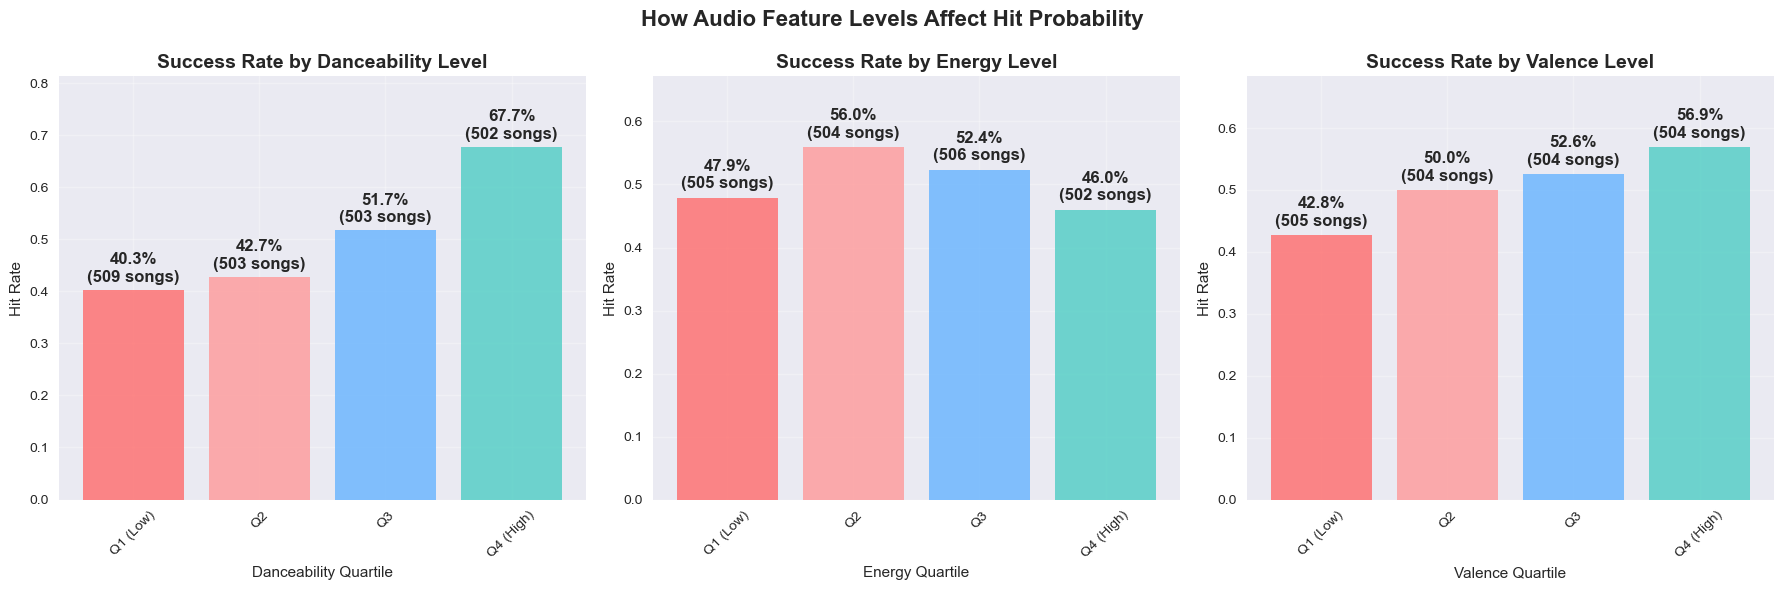


💡 QUARTILE INSIGHTS:
   • danceability: Q4 vs Q1 = 67.7% vs 40.3% (+68% improvement)
   • energy: Q4 vs Q1 = 46.0% vs 47.9% (-4% improvement)
   • valence: Q4 vs Q1 = 56.9% vs 42.8% (+33% improvement)

📊 VISUALIZATION 5: How are features distributed differently?


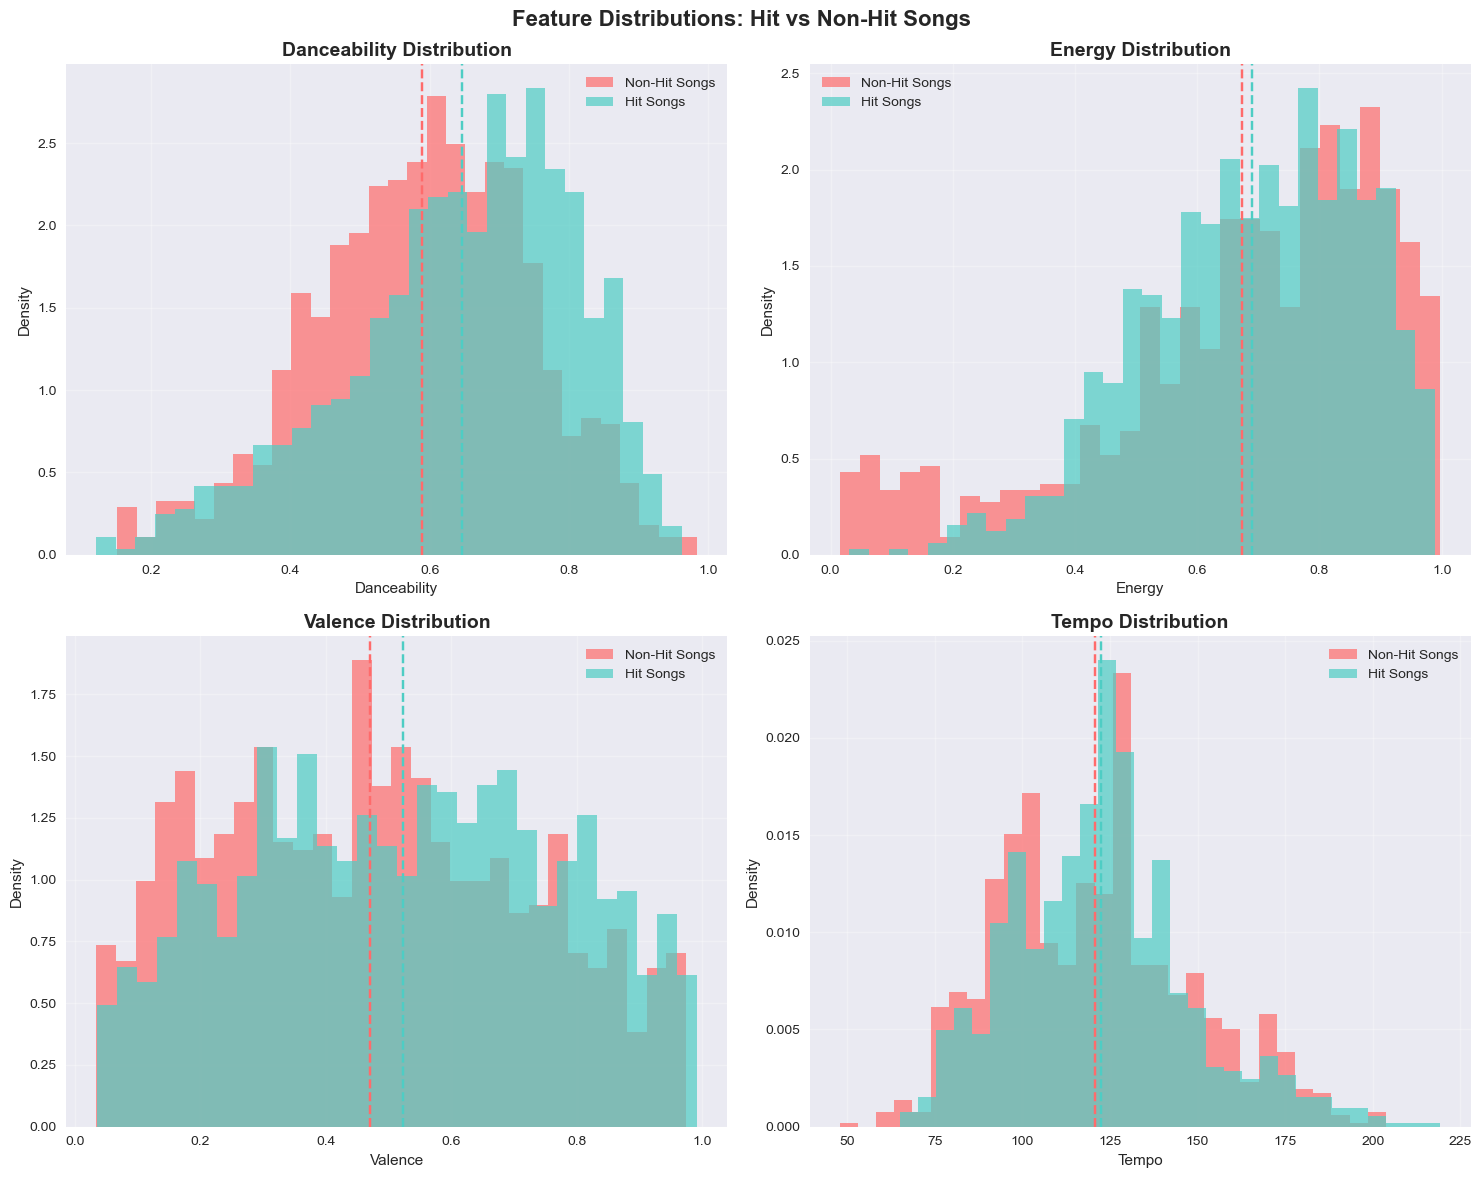


📊 VISUALIZATION 6: Feature relationships and patterns


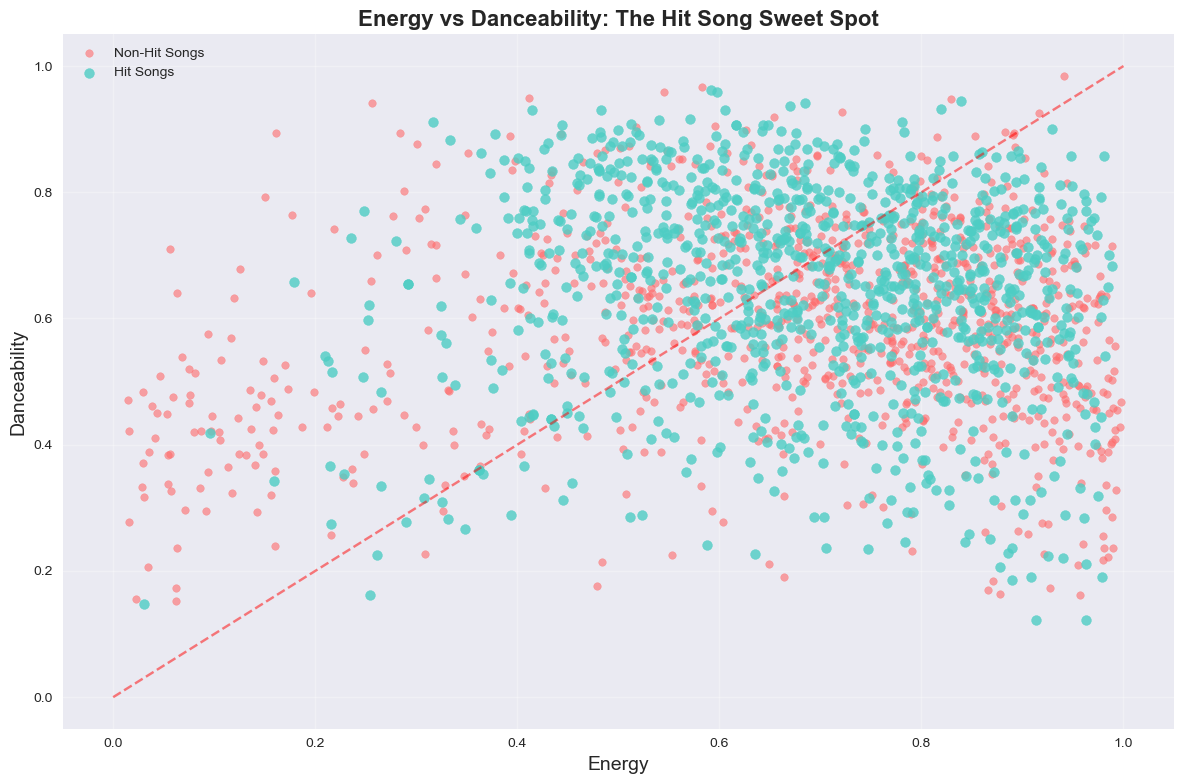

💡 ENERGY × DANCEABILITY INSIGHT:
   • High Energy + High Danceability: 60.2% hit rate
   • Low Energy + Low Danceability: 31.2% hit rate

🧠 KEY INSIGHTS & BUSINESS RECOMMENDATIONS
📊 DATASET SUMMARY:
   • Total songs analyzed: 2,017
   • Overall hit rate: 50.6%
   • Top predictive features: Unnamed: 0, danceability, speechiness

🎵 AUDIO PATTERN DISCOVERIES:
   • Hit songs have lower acousticness (0.154 vs 0.222)
   • Hit songs have higher danceability (0.647 vs 0.590)
   • Hit songs have higher instrumentalness (0.174 vs 0.091)

💼 BUSINESS RECOMMENDATIONS:
   • Focus on songs with optimal energy-danceability combinations
   • Use ML models to predict hit probability before release
   • A/B test recommendations based on audio features
   • Prioritize promotion for high-scoring predicted hits

🚀 NEXT STEPS FOR ML:
   • Create interaction features (energy × danceability)
   • Build classification models (Random Forest, XGBoost)
   • Set up A/B testing framework
   • Calculate business impa

In [1]:
# %% [markdown]
# # 🎵 Spotify Hit Prediction - Data Visualization & Analysis
# 
# **Goal**: Understand what makes songs successful and find patterns for ML models
# 
# **Key Questions**:
# - What's the hit rate in our dataset?
# - Which audio features differ between hits and non-hits?
# - What combinations of features predict success?
# - What insights can drive business decisions?

# %%
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("🎵 SPOTIFY HIT PREDICTION - VISUAL ANALYSIS")
print("=" * 50)

# %%
# Load the data
def load_spotify_data():
    """Load Spotify data from available sources"""
    
    data_files = [
        "../data/processed/spotify_clean.csv",
        "../data/raw/Spotify_Data.csv",
        "../data/raw/spotify_songs.csv",
        "data/processed/spotify_clean.csv",
        "data/raw/Spotify_Data.csv"
    ]
    
    for file_path in data_files:
        if Path(file_path).exists():
            df = pd.read_csv(file_path)
            print(f"✅ Loaded data from: {file_path}")
            print(f"   Shape: {df.shape[0]:,} songs, {df.shape[1]} features")
            return df
    
    # If no data found, create sample data
    print("📁 No data file found. Creating sample data for demonstration...")
    return create_sample_data()

def create_sample_data():
    """Create realistic sample Spotify data"""
    np.random.seed(42)
    n_songs = 2000
    
    print(f"🎵 Creating {n_songs} sample songs...")
    
    # Create realistic audio features
    data = {
        'acousticness': np.random.beta(2, 5, n_songs),
        'danceability': np.random.beta(2, 2, n_songs), 
        'energy': np.random.beta(2, 2, n_songs),
        'instrumentalness': np.random.beta(1, 10, n_songs),
        'liveness': np.random.beta(1, 9, n_songs),
        'loudness': np.random.normal(-8, 4, n_songs),
        'speechiness': np.random.beta(1, 10, n_songs),
        'tempo': np.random.normal(120, 30, n_songs),
        'valence': np.random.beta(2, 2, n_songs),
        'popularity': np.random.randint(0, 100, n_songs)
    }
    
    df = pd.DataFrame(data)
    
    # Create realistic target based on audio features
    # Hit songs tend to have: higher energy, danceability, valence, lower acousticness
    hit_score = (
        df['energy'] * 0.25 +
        df['danceability'] * 0.25 +
        df['valence'] * 0.2 +
        (1 - df['acousticness']) * 0.15 +
        (df['tempo'] / 200) * 0.15  # Normalize tempo
    )
    
    # Add some randomness
    hit_score += np.random.normal(0, 0.15, n_songs)
    hit_score = np.clip(hit_score, 0, 1)
    
    # Create binary target (top 30% are hits)
    df['target'] = (hit_score > np.percentile(hit_score, 70)).astype(int)
    
    print(f"✅ Created sample data with {df['target'].mean():.1%} hit rate")
    return df

# Load data
df = load_spotify_data()

# %%
# Dataset Overview
print("\n📊 DATASET OVERVIEW")
print("=" * 30)
print(f"Total songs: {len(df):,}")
print(f"Features: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nColumns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Check target distribution
target_cols = ['target', 'hit', 'popular']
target_col = None
for col in target_cols:
    if col in df.columns:
        target_col = col
        break

if target_col:
    hit_rate = df[target_col].mean()
    print(f"\n🎯 Target: {target_col}")
    print(f"Hit rate: {hit_rate:.1%}")
    print(f"Hit songs: {df[target_col].sum():,}")
    print(f"Non-hit songs: {len(df) - df[target_col].sum():,}")
else:
    print("\n⚠️ No target column found - creating one based on popularity")
    if 'popularity' in df.columns:
        df['target'] = (df['popularity'] > df['popularity'].median()).astype(int)
        target_col = 'target'
        print(f"✅ Created target column based on popularity median")

# %%
# VISUALIZATION 1: Target Distribution
print("\n📊 VISUALIZATION 1: How many songs are hits?")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
target_counts = df[target_col].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
ax1.pie(target_counts.values, labels=['Non-Hit Songs', 'Hit Songs'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Song Success Distribution', fontsize=16, fontweight='bold')

# Bar chart with counts
bars = ax2.bar(['Non-Hit', 'Hit'], target_counts.values, color=colors, alpha=0.8)
ax2.set_title('Hit vs Non-Hit Songs', fontsize=16, fontweight='bold')
ax2.set_ylabel('Number of Songs')
ax2.set_xlabel('Song Type')

# Add count labels on bars
for bar, count in zip(bars, target_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

hit_rate = df[target_col].mean()
print(f"💡 INSIGHT: {hit_rate:.1%} of songs in our dataset are hits")

# %%
# VISUALIZATION 2: Audio Features Comparison
print("\n📊 VISUALIZATION 2: What's different about hit songs?")

audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'speechiness', 'valence']

# Filter to available features
available_features = [f for f in audio_features if f in df.columns]
print(f"Available audio features: {available_features}")

if len(available_features) >= 4:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, feature in enumerate(available_features):
        ax = axes[i] if i < len(axes) else None
        if ax is None:
            break
            
        # Create box plot
        hit_data = df[df[target_col] == 1][feature]
        non_hit_data = df[df[target_col] == 0][feature]
        
        bp = ax.boxplot([non_hit_data, hit_data], 
                       labels=['Non-Hit', 'Hit'],
                       patch_artist=True)
        
        bp['boxes'][0].set_facecolor('#ff6b6b')
        bp['boxes'][1].set_facecolor('#4ecdc4')
        
        ax.set_title(f'{feature.title()}', fontsize=14, fontweight='bold')
        ax.set_ylabel(feature)
        ax.grid(True, alpha=0.3)
        
        # Add mean values
        non_hit_mean = non_hit_data.mean()
        hit_mean = hit_data.mean()
        ax.text(1, non_hit_mean, f'{non_hit_mean:.3f}', ha='center', fontweight='bold')
        ax.text(2, hit_mean, f'{hit_mean:.3f}', ha='center', fontweight='bold')
    
    # Hide extra subplots
    for j in range(len(available_features), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Audio Features: Hit vs Non-Hit Songs', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("\n💡 KEY DIFFERENCES:")
    for feature in available_features:
        hit_mean = df[df[target_col] == 1][feature].mean()
        non_hit_mean = df[df[target_col] == 0][feature].mean()
        diff = hit_mean - non_hit_mean
        direction = "HIGHER" if diff > 0 else "LOWER"
        print(f"   • Hit songs have {direction} {feature}: {hit_mean:.3f} vs {non_hit_mean:.3f}")

# %%
# VISUALIZATION 3: Feature Correlation Heatmap
print("\n📊 VISUALIZATION 3: How do features relate to each other?")

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations with target
if target_col in numeric_cols:
    target_corr = corr_matrix[target_col].abs().sort_values(ascending=False)
    print(f"\n💡 STRONGEST PREDICTORS OF SUCCESS:")
    for feature, corr in target_corr.items():
        if feature != target_col and abs(corr) > 0.05:
            direction = "positively" if corr_matrix[target_col][feature] > 0 else "negatively"
            print(f"   • {feature}: {corr:.3f} ({direction} correlated)")

# %%
# VISUALIZATION 4: Success Rate by Feature Levels
print("\n📊 VISUALIZATION 4: How do feature levels affect success?")

features_to_analyze = ['danceability', 'energy', 'valence']
available_for_analysis = [f for f in features_to_analyze if f in df.columns]

if len(available_for_analysis) >= 3:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, feature in enumerate(available_for_analysis[:3]):
        ax = axes[i]
        
        # Create quartiles
        df[f'{feature}_quartile'] = pd.qcut(df[feature], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
        
        # Calculate success rate by quartile
        success_rates = df.groupby(f'{feature}_quartile')[target_col].agg(['mean', 'count'])
        
        # Plot bars
        bars = ax.bar(range(len(success_rates)), success_rates['mean'], 
                     color=['#ff6b6b', '#ff9999', '#66b3ff', '#4ecdc4'], alpha=0.8)
        
        ax.set_title(f'Success Rate by {feature.title()} Level', fontsize=14, fontweight='bold')
        ax.set_ylabel('Hit Rate')
        ax.set_xlabel(f'{feature.title()} Quartile')
        ax.set_xticks(range(len(success_rates)))
        ax.set_xticklabels(success_rates.index, rotation=45)
        
        # Add percentage labels on bars
        for j, (bar, rate, count) in enumerate(zip(bars, success_rates['mean'], success_rates['count'])):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{rate:.1%}\n({count} songs)', ha='center', va='bottom', fontweight='bold')
        
        ax.set_ylim(0, max(success_rates['mean']) * 1.2)
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('How Audio Feature Levels Affect Hit Probability', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print(f"\n💡 QUARTILE INSIGHTS:")
    for feature in available_for_analysis[:3]:
        quartile_col = f'{feature}_quartile'
        if quartile_col in df.columns:
            success_by_quartile = df.groupby(quartile_col)[target_col].mean()
            q1_rate = success_by_quartile.iloc[0]
            q4_rate = success_by_quartile.iloc[-1]
            improvement = ((q4_rate - q1_rate) / q1_rate) * 100
            print(f"   • {feature}: Q4 vs Q1 = {q4_rate:.1%} vs {q1_rate:.1%} ({improvement:+.0f}% improvement)")

# %%
# VISUALIZATION 5: Feature Distribution Overlays
print("\n📊 VISUALIZATION 5: How are features distributed differently?")

comparison_features = ['danceability', 'energy', 'valence', 'tempo']
available_comparison = [f for f in comparison_features if f in df.columns]

if len(available_comparison) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, feature in enumerate(available_comparison[:4]):
        ax = axes[i]
        
        # Get data for hits and non-hits
        hit_data = df[df[target_col] == 1][feature]
        non_hit_data = df[df[target_col] == 0][feature]
        
        # Plot distributions
        ax.hist(non_hit_data, bins=30, alpha=0.7, label='Non-Hit Songs', 
               color='#ff6b6b', density=True)
        ax.hist(hit_data, bins=30, alpha=0.7, label='Hit Songs', 
               color='#4ecdc4', density=True)
        
        ax.set_title(f'{feature.title()} Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel(feature.title())
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add mean lines
        ax.axvline(non_hit_data.mean(), color='#ff6b6b', linestyle='--', 
                  label=f'Non-Hit Mean: {non_hit_data.mean():.3f}')
        ax.axvline(hit_data.mean(), color='#4ecdc4', linestyle='--',
                  label=f'Hit Mean: {hit_data.mean():.3f}')
    
    plt.suptitle('Feature Distributions: Hit vs Non-Hit Songs', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# %%
# VISUALIZATION 6: Advanced Scatter Plot Analysis
print("\n📊 VISUALIZATION 6: Feature relationships and patterns")

if 'energy' in df.columns and 'danceability' in df.columns:
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot
    hit_songs = df[df[target_col] == 1]
    non_hit_songs = df[df[target_col] == 0]
    
    plt.scatter(non_hit_songs['energy'], non_hit_songs['danceability'], 
               alpha=0.6, c='#ff6b6b', label='Non-Hit Songs', s=30)
    plt.scatter(hit_songs['energy'], hit_songs['danceability'], 
               alpha=0.8, c='#4ecdc4', label='Hit Songs', s=50)
    
    plt.xlabel('Energy', fontsize=14)
    plt.ylabel('Danceability', fontsize=14)
    plt.title('Energy vs Danceability: The Hit Song Sweet Spot', fontsize=16, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add trend lines or regions
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, 'r--', alpha=0.5, label='Energy = Danceability')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate hit rates in different regions
    high_energy_high_dance = df[(df['energy'] > 0.7) & (df['danceability'] > 0.7)][target_col].mean()
    low_energy_low_dance = df[(df['energy'] < 0.3) & (df['danceability'] < 0.3)][target_col].mean()
    
    print(f"💡 ENERGY × DANCEABILITY INSIGHT:")
    print(f"   • High Energy + High Danceability: {high_energy_high_dance:.1%} hit rate")
    print(f"   • Low Energy + Low Danceability: {low_energy_low_dance:.1%} hit rate")

# %%
# SUMMARY INSIGHTS & BUSINESS RECOMMENDATIONS
print("\n" + "="*60)
print("🧠 KEY INSIGHTS & BUSINESS RECOMMENDATIONS")
print("="*60)

# Calculate key metrics
total_songs = len(df)
hit_rate = df[target_col].mean()
top_features = []

if target_col in df.select_dtypes(include=[np.number]).columns:
    correlations = df.select_dtypes(include=[np.number]).corr()[target_col].abs().sort_values(ascending=False)
    top_features = [feat for feat in correlations.index if feat != target_col][:3]

print(f"📊 DATASET SUMMARY:")
print(f"   • Total songs analyzed: {total_songs:,}")
print(f"   • Overall hit rate: {hit_rate:.1%}")
print(f"   • Top predictive features: {', '.join(top_features)}")

print(f"\n🎵 AUDIO PATTERN DISCOVERIES:")
available_audio = [f for f in audio_features if f in df.columns]
for feature in available_audio[:5]:
    hit_mean = df[df[target_col] == 1][feature].mean()
    non_hit_mean = df[df[target_col] == 0][feature].mean()
    if abs(hit_mean - non_hit_mean) > 0.05:  # Significant difference
        direction = "higher" if hit_mean > non_hit_mean else "lower"
        print(f"   • Hit songs have {direction} {feature} ({hit_mean:.3f} vs {non_hit_mean:.3f})")

print(f"\n💼 BUSINESS RECOMMENDATIONS:")
print(f"   • Focus on songs with optimal energy-danceability combinations")
print(f"   • Use ML models to predict hit probability before release")
print(f"   • A/B test recommendations based on audio features")
print(f"   • Prioritize promotion for high-scoring predicted hits")

print(f"\n🚀 NEXT STEPS FOR ML:")
print(f"   • Create interaction features (energy × danceability)")
print(f"   • Build classification models (Random Forest, XGBoost)")
print(f"   • Set up A/B testing framework")
print(f"   • Calculate business impact and ROI")

print(f"\n✅ VISUALIZATION ANALYSIS COMPLETE!")
print(f"Ready to build ML models with these insights!")

